Coursera Google Advanced Data Analytics

Course 5 Regression Analysis Simplify Complex Data Relationships

Module 5 Logistic regression

*   Construct a logistic regression model with Python
*   Evaluate a binomial logistic regression model


### Construct a logistic regression model with Python

In [11]:
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Data modified from

Torres, R., Visvanathan, R., & Ranasinghe, D. (2013). Activity recognition with healthy older people using a batteryless wearable sensor [Dataset]. UCI Machine Learning Repository.
[https://doi.org/10.24432/C5GG6B.](https://archive.ics.uci.edu/dataset/427/activity+recognition+with+healthy+older+people+using+a+batteryless+wearable+sensor)


In [2]:
activity = pd.read_csv("/content/activity.csv")

The
activity
dataset contains:
494 rows
– each row represents an action as captured by a body-worn motion sensor


|        Column name              |  Type  |  Description |
| :---:                            |    :---:       |    :---:                              |
| ACC vertical                           | int64 | Represents the acceleration of one of the study participants <br>in terms of their vertical axis while in the process of laying down. |
| Lying down                              |  int64 | If “0,” the subject was performing a diff erent activity.<br> If “1” the subject was performing the lying down activity.  |

In [3]:
activity.describe()

,Acc (vertical),LyingDown
count,494.000000,494.000000
mean,45.512363,0.516194
std,44.799360,0.500244
min,-48.459000,0.000000
25%,0.918650,0.000000
50%,41.109500,1.000000
75%,89.339000,1.000000
max,112.310000,1.000000


In [4]:
activity.head()

,Acc (vertical),LyingDown
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0


In [5]:
X = activity[["Acc (vertical)"]]
y = activity[["LyingDown"]]

Set the `test_size` to `0.3` so that the holdout dataset is only 30% of the total data. Set the `random_state` equal to `42`. If you change this variable, then your results will be different from this note book. Setting the `random_state` is mainly for reproducibility purposes.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [7]:
clf = LogisticRegression().fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
# Print the coefficient
clf.coef_

array([[-0.1177471]])

In [9]:
# Print the intercept
clf.intercept_

array([6.10180958])

Model has an intercept or $\beta_0$ of 6.10 and a $\beta_1$ of -0.12.

$logit(p)$ $=$ $log(\frac{p}{1 - p})$ $=$ $\beta_0$ $+$ $\beta_1$ $where$ $p$ $=$ $P(Y = 1)$

<Axes: xlabel='Acc (vertical)', ylabel='LyingDown'>

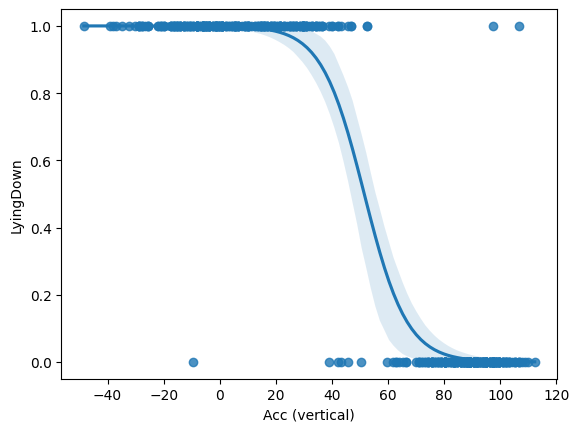

In [10]:
# Plot the logistic regression and its confidence band
sns.regplot(x="Acc (vertical)", y="LyingDown", data=activity, logistic=True)

 One where the person is lying down, when the variable equals one. The other one is when the person is not lying down, when the variable equals zero.

 Find the best way to determine the likelihood of someone lying down based on vertical acceleration.

### Evaluate a binomial logistic regression model

In [12]:
# Split data into training and holdout samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build regression model
clf = LogisticRegression().fit(X_train,y_train)

# Save predictions
y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0 means not lying down, and 1 means lying down.

In [13]:
# Print out the predicted labels
clf.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

In [14]:
# Print out the predicted probabilities
clf.predict_proba(X_test)[::,-1]

array([2.31690858e-02, 9.97511643e-01, 1.04280601e-02, 1.05669826e-03,
       9.99781265e-01, 1.04280601e-02, 4.66008916e-03, 9.95733982e-01,
       9.72344491e-01, 2.31690858e-02, 9.97825656e-01, 1.36210414e-02,
       3.43613958e-02, 9.95733982e-01, 9.98892897e-01, 5.75926041e-02,
       4.77299711e-01, 6.09785081e-03, 9.98732818e-01, 9.92695803e-01,
       3.91400562e-02, 9.31713690e-01, 9.64064069e-01, 1.55636152e-02,
       9.83708684e-01, 1.19193813e-02, 7.55109695e-01, 8.74058541e-01,
       3.43613958e-02, 9.91646480e-01, 1.77761812e-02, 1.19193813e-02,
       9.97152398e-01, 2.64338338e-02, 9.98892897e-01, 1.19193813e-02,
       9.31713690e-01, 9.95119380e-01, 9.00936838e-01, 9.22595259e-01,
       8.39842140e-02, 9.99624404e-01, 1.19193813e-02, 8.01630725e-01,
       5.33097419e-03, 1.36210414e-02, 3.01444198e-02, 3.55969345e-03,
       4.07280935e-03, 1.19193813e-02, 9.98892897e-01, 6.53832873e-02,
       4.07280935e-03, 9.98892897e-01, 9.12054235e-03, 9.53423143e-01,
      

*   Actual labels of the holdout sample, stored as `y_test`
*   Predicted labels of the holdout sample, stored as `y_pred`
*   The names of the labels, which you can access using `clf.classes_`



In [15]:
# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)

In [16]:
# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)


|            |    |  True Class |
| :---:      |    :---:   | :---:                   |
| Predicted Class         | TN<br>True Negatives | FP <br>False Positives |
|   |  FN<br>False Negatives |  TP <br>True Positives  |

*   True negatives: The number of people that were not lying down that the model accurately predicted were not lying down.
*   False negatives: The number of people that were lying down that the model inaccurately predicted were not lying down.
*   False positives: The number of people that were not lying down that the model inaccurately predicted were lying down.
*   True positives: The number of people that were lying down that the model accurately predicted were lying down.



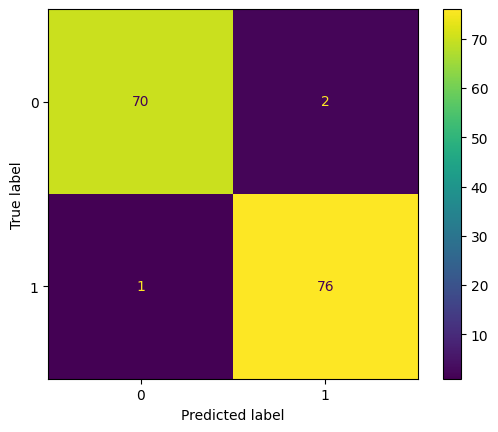

In [17]:
# Display the confusion matrix
disp.plot()